<h1>POSTTEST 6</h1>
<p>Muhammad Alfarezy Cannavaro</p>
<a href='https://github.com/2009106055/Praktikum_KB'>Link Github Alfarezy</a>

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Untuk Melakukan Data Cleaning
from sklearn.impute import SimpleImputer
#Untuk K-Means
from sklearn.cluster import KMeans

In [49]:
df = pd.read_csv("tmdb_5000_movies.csv")

In [50]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [52]:
df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [53]:
df2 = pd.read_csv('database.csv')

In [54]:
df2

,Year,Ceremony,Award,Winner,Name,Film
0,1927/1928,1,Actor,NaN,Richard Barthelmess,The Noose
1,1927/1928,1,Actor,1.0,Emil Jannings,The Last Command
2,1927/1928,1,Actress,NaN,Louise Dresser,A Ship Comes In
3,1927/1928,1,Actress,1.0,Janet Gaynor,7th Heaven
4,1927/1928,1,Actress,NaN,Gloria Swanson,Sadie Thompson
...,...,...,...,...,...,...
9959,2015,88,Writing (Original Screenplay),1.0,Spotlight,Written by Josh Singer & Tom McCarthy
9960,2015,88,Writing (Original Screenplay),NaN,Straight Outta Compton,Screenplay by Jonathan Herman and Andrea Berlo...
9961,2015,88,Jean Hersholt Humanitarian Award,1.0,Debbie Reynolds,NaN
9962,2015,88,Honorary Award,1.0,Spike Lee,NaN


In [55]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9964 entries, 0 to 9963
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      9964 non-null   object 
 1   Ceremony  9964 non-null   int64  
 2   Award     9964 non-null   object 
 3   Winner    2321 non-null   float64
 4   Name      9964 non-null   object 
 5   Film      9631 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 467.2+ KB


In [56]:
df2.isna().sum()

Year           0
Ceremony       0
Award          0
Winner      7643
Name           0
Film         333
dtype: int64

In [57]:
df3 = pd.read_csv('FIFA22_PlayerCards.csv')

In [58]:
df3

,PlayerName,Foot,Position,AWR,DWR,OVR,PAC,SHO,PAS,DRI,DEF,PHY,SM,DIV,POS,HAN,REF,KIC,SPD
0,Pelé,Right,CAM,High,Med,98,95.0,96.0,93.0,96.0,60.0,76.0,5,NaN,NaN,NaN,NaN,NaN,NaN
1,Diego Maradona,Left,CAM,High,Med,97,92.0,93.0,92.0,97.0,40.0,76.0,5,NaN,NaN,NaN,NaN,NaN,NaN
2,Ronaldo,Right,ST,Med,Med,96,97.0,95.0,81.0,95.0,45.0,76.0,5,NaN,NaN,NaN,NaN,NaN,NaN
3,Zinedine Zidane,Right,CAM,Med,Med,96,85.0,92.0,96.0,95.0,75.0,86.0,5,NaN,NaN,NaN,NaN,NaN,NaN
4,Diego Maradona,Left,CAM,High,Med,95,88.0,91.0,90.0,95.0,42.0,75.0,5,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15923,Patrick McGarvey,Right,GK,Med,Med,48,NaN,NaN,NaN,NaN,NaN,NaN,1,49.0,43.0,47.0,51.0,47.0,31.0
15924,Lalbiakhlua Jongte,Left,GK,Med,Med,48,NaN,NaN,NaN,NaN,NaN,NaN,1,49.0,48.0,46.0,47.0,48.0,18.0
15925,Muheet Shabir Khan,Right,GK,Med,Med,48,NaN,NaN,NaN,NaN,NaN,NaN,1,49.0,45.0,50.0,47.0,46.0,22.0
15926,Arsh Shaikh,Right,GK,Med,Med,47,NaN,NaN,NaN,NaN,NaN,NaN,1,49.0,45.0,41.0,49.0,39.0,19.0


In [59]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15928 entries, 0 to 15927
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   PlayerName  15928 non-null  object 
 1   Foot        15928 non-null  object 
 2   Position    15928 non-null  object 
 3   AWR         15919 non-null  object 
 4   DWR         15919 non-null  object 
 5   OVR         15928 non-null  int64  
 6   PAC         14162 non-null  float64
 7   SHO         14162 non-null  float64
 8   PAS         14162 non-null  float64
 9   DRI         14162 non-null  float64
 10  DEF         14162 non-null  float64
 11  PHY         14162 non-null  float64
 12  SM          15928 non-null  int64  
 13  DIV         1766 non-null   float64
 14  POS         1766 non-null   float64
 15  HAN         1766 non-null   float64
 16  REF         1766 non-null   float64
 17  KIC         1766 non-null   float64
 18  SPD         1766 non-null   float64
dtypes: float64(12), int64(2),

In [60]:
df3.isna().sum()

PlayerName        0
Foot              0
Position          0
AWR               9
DWR               9
OVR               0
PAC            1766
SHO            1766
PAS            1766
DRI            1766
DEF            1766
PHY            1766
SM                0
DIV           14162
POS           14162
HAN           14162
REF           14162
KIC           14162
SPD           14162
dtype: int64

<h1>DATA CLEANING</h1>

In [61]:
dataset_cl1 = df.copy()
dataset_cl2 = df2.copy()
dataset_cl3 = df.copy()

In [62]:
imputer_mean = SimpleImputer(strategy='mean')
imputer_median = SimpleImputer(strategy='median')
imputer_modus = SimpleImputer(strategy='most_frequent')

<h5>Modus</h5>

In [63]:
dataset_cl1['runtime'] = imputer_modus.fit_transform(dataset_cl1[['runtime']])

dataset_cl1.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    0
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

<h5>Mean</h5>

In [64]:
dataset_cl2['Winner'] = imputer_mean.fit_transform(dataset_cl2[['Winner']])

dataset_cl2.isna().sum()

Year          0
Ceremony      0
Award         0
Winner        0
Name          0
Film        333
dtype: int64

<h5>Mengahpus Record/Feature</h5>

In [65]:
dataset_cl3.dropna(inplace=True)

dataset_cl3.isna().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

<h5>Data Duplikat</h5>

In [66]:
dataset_duplicate = df3.copy()

dataset_duplicate.duplicated().sum()

133

In [67]:
dataset_duplicate.drop_duplicates(inplace=True)

dataset_duplicate.duplicated().sum()

0

<h1>K-MEANS</h1>
<h5>Algoritma ini menemukan kelompok data dengan nilai squared error antara rata-rata
empiris dari cluster dan point di cluster minimum. Algoritma ini termasuk dalam
clustering dengan pendekatan partitional.</h5>

In [68]:
dataset_cl3.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [69]:
model = KMeans(n_clusters=4)

In [70]:
point = dataset_cl3[['runtime','vote_average']]

In [71]:
model.fit(point)

KMeans(n_clusters=4)

In [72]:
label = model.labels_

In [73]:
label

array([2, 2, 2, ..., 0, 0, 0])

In [74]:
X = point['runtime']
Y = point['vote_average']

In [75]:
centroid = model.cluster_centers_

In [76]:
centroid

array([[ 90.14949495,   5.88989899],
       [106.69982238,   6.24404973],
       [155.96590909,   7.15454545],
       [126.23919308,   6.64236311]])

In [77]:
centroid_X = centroid[:,0]
centroid_Y = centroid[:,1]

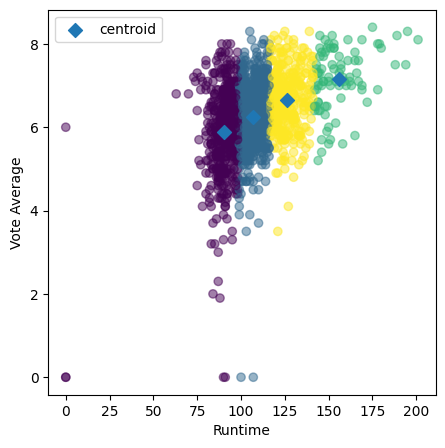

In [79]:
plt.figure(figsize=(5,5))
plt.scatter(X, Y, alpha=0.5, c=label)
plt.scatter(centroid_X, centroid_Y, marker='D', s=50, label='centroid')
plt.xlabel('Runtime')
plt.ylabel('Vote Average')
plt.legend()
plt.show()

In [80]:
cluster_range = range(1,6)
inertias = []

for k in cluster_range:
    model = KMeans(n_clusters=k)
    model.fit(point)
    inertias.append(model.inertia_)

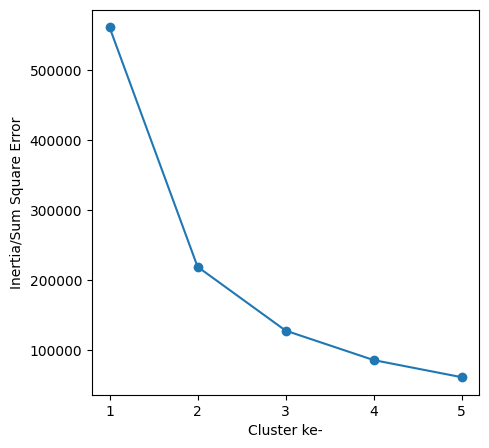

In [83]:
plt.figure(figsize=(5,5))
plt.plot(cluster_range, inertias, '-o')
plt.xlabel('Cluster ke-')
plt.ylabel('Inertia/Sum Square Error')
plt.xticks(cluster_range)
plt.show()